In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import scipy.stats
import scipy.stats as st
from scipy.stats import ttest_1samp

In [2]:
data = pd.read_csv("/Users/szabonikolett/Desktop/tech-challenge/technical_challenge_DA/data/measurements.csv")
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
data2 = pd.read_excel("/Users/szabonikolett/Desktop/tech-challenge/technical_challenge_DA/data/measurements2.xlsx")
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [ ]:
## As the 2 datasets contain the same data in 2 different formats, I will be working on the data(csv)

In [4]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower().replace(' ', '_')) 
data.columns = cols

data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
# replacing all the commas in the columns with dot
def commas(y):
    y = y.replace(",",".", regex = True)
    return(y)

In [6]:
gas = commas(data)
gas

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,3.8,45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25,31,AC,SP98,1,0,0,NaN,NaN


In [7]:
gas.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [8]:
gas['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [9]:
gas['refill_liters'].value_counts(dropna=False) # dropping this column as there is not enough data to replace NaNs

NaN     375
45        2
37.7      2
39        2
37.6      1
38        1
38.3      1
10        1
41        1
37        1
37.2      1
Name: refill_liters, dtype: int64

In [10]:
# Deleting columns I will not need as their values are already presented in other columns
gas = gas.drop(['refill_liters', 'refill_gas'], axis=1)

In [11]:
gas['temp_inside'].value_counts(dropna=False)

21.5    133
22      102
22.5     59
20       25
21       13
23       13
NaN      12
25       12
24.5      7
20.5      4
24        3
23.5      2
25.5      2
19        1
Name: temp_inside, dtype: int64

In [12]:
gas['temp_inside'] = gas['temp_inside'].astype(np.float64)
gas['temp_inside'] = gas['temp_inside'].fillna(round(gas['temp_inside'].mean())) # replacing NaNs with the avg value
    
gas['specials'] = gas['specials'].fillna('U') # replacing the NaNs with U

In [13]:
price = []
for i in gas['gas_type']:
    if 'E10' in i:
        price.append(1.87)
    else:
        price.append(1.73)
        
gas['price'] = price

In [14]:
gas

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,price
0,28,5,26,21.5,12,U,E10,0,0,0,1.87
1,12,4.2,30,21.5,13,U,E10,0,0,0,1.87
2,11.2,5.5,38,21.5,15,U,E10,0,0,0,1.87
3,12.9,3.9,36,21.5,14,U,E10,0,0,0,1.87
4,18.5,4.5,46,21.5,15,U,E10,0,0,0,1.87
...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,U,SP98,0,0,0,1.73
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,1.73
385,16,3.8,45,25.0,19,U,SP98,0,0,0,1.73
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,1.73


# Visualisation 

<AxesSubplot:ylabel='price'>

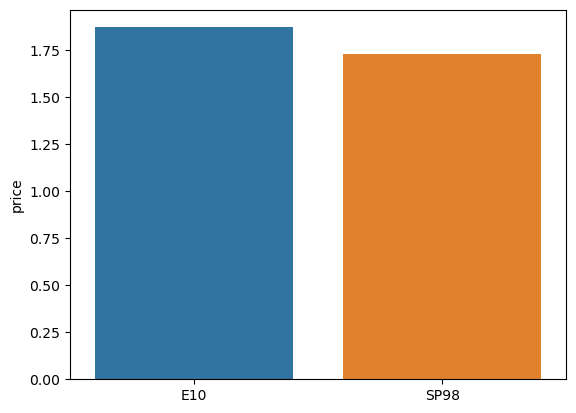

In [15]:
pair = gas.groupby('gas_type')['price'].mean()

sns.barplot(data=gas, x=gas['gas_type'].unique(), y=pair)

In [ ]:
## According to the provided dataset the average price for E10 fuel is more expensive than SP98

<AxesSubplot:ylabel='price'>

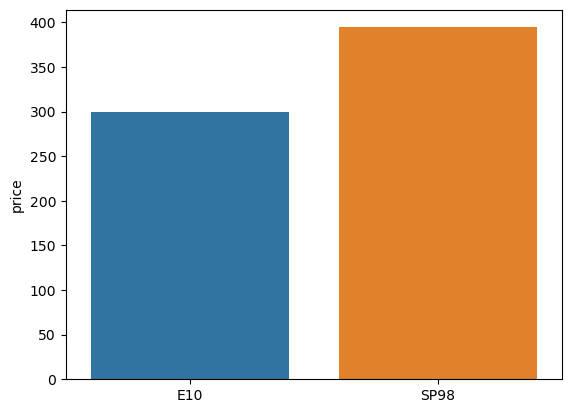

In [16]:
pair = gas.groupby('gas_type')['price'].sum()

sns.barplot(data=gas, x=gas['gas_type'].unique(), y=pair)

In [ ]:
## After further plotting, we can see that people in total spent more o SP98

/Users/szabonikolett/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

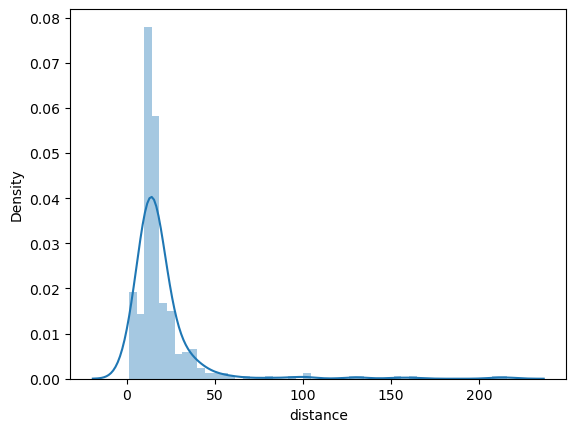

In [17]:
sns.distplot(gas['distance'])

In [ ]:
## The majority of distance / journey was on average btw 0-50km 

/Users/szabonikolett/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

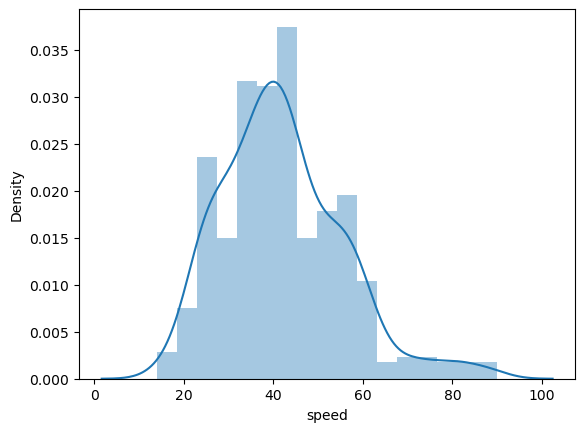

In [18]:
sns.distplot(gas['speed'])

In [ ]:
## Only a small minority exceeded 60 km/h

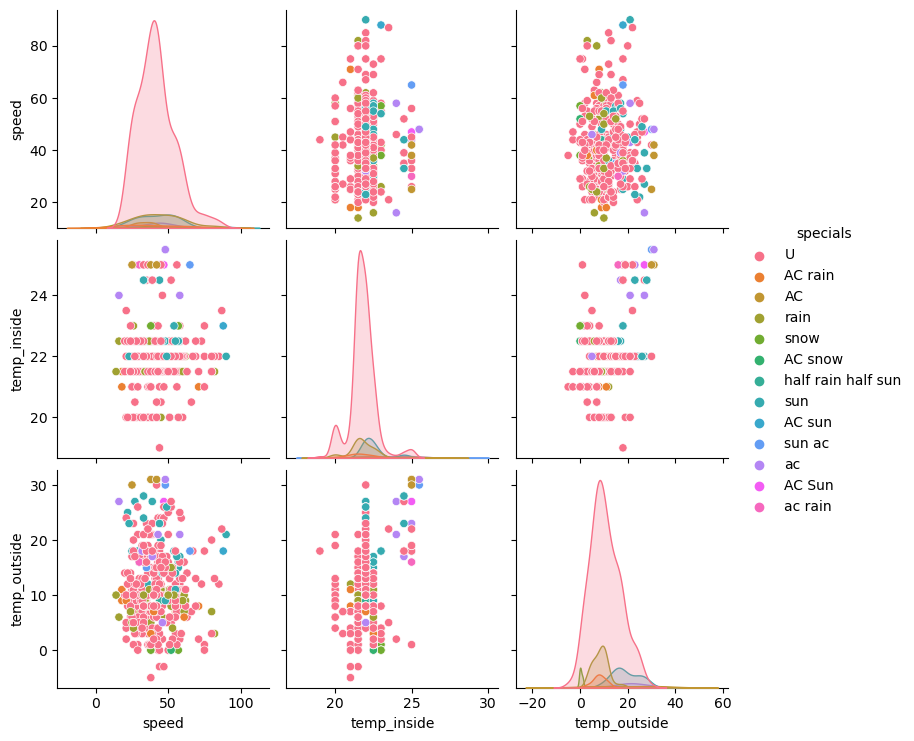

In [28]:
sns.pairplot(data = gas[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
plt.show()

# Balancing the data 

In [ ]:
## Previously we have seen that the E10 is less used compared to SP98 so we have to upsample to 
## make up for the difference

In [29]:
df = gas

In [22]:
#E10 = df[df['gas_type'] == 'E10']
#E10 = E10.reset_index(drop = True)
#SP98 = df[df['gas_type'] == 'SP98'][0:160]
#SP98 = SP98.reset_index(drop = True)

In [23]:
#df = pd.concat([E10,SP98]).reset_index(drop = True)


In [30]:
df.corr()

,speed,temp_inside,temp_outside,ac,rain,sun,price
speed,1.000000,0.059139,0.015411,-0.035408,0.009489,0.081618,0.097360
temp_inside,0.059139,1.000000,0.359649,0.296719,-0.037204,0.242237,-0.010921
temp_outside,0.015411,0.359649,1.000000,0.167562,-0.186315,0.346903,-0.148705
ac,-0.035408,0.296719,0.167562,1.000000,0.242915,0.088598,-0.105285
rain,0.009489,-0.037204,-0.186315,0.242915,1.000000,-0.112650,-0.060328
sun,0.081618,0.242237,0.346903,0.088598,-0.112650,1.000000,-0.022761
price,0.097360,-0.010921,-0.148705,-0.105285,-0.060328,-0.022761,1.000000


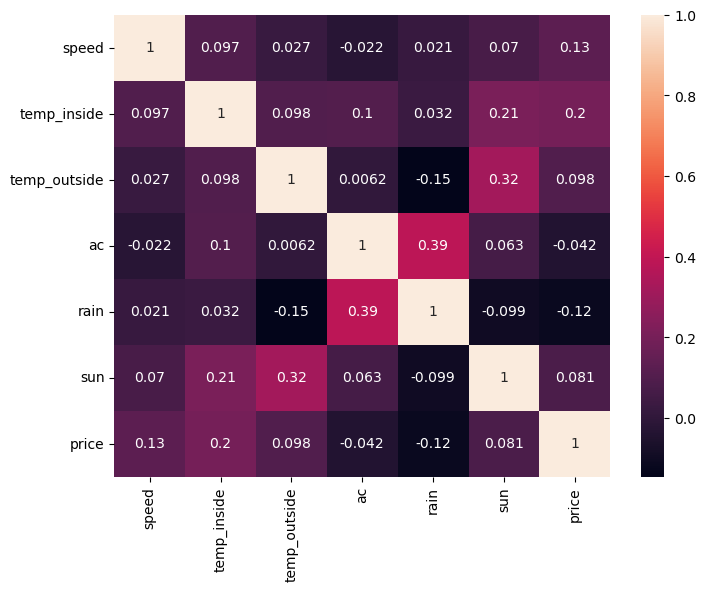

In [25]:
## To have a better picture of the correlation, priting the correlation matrix as well

corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

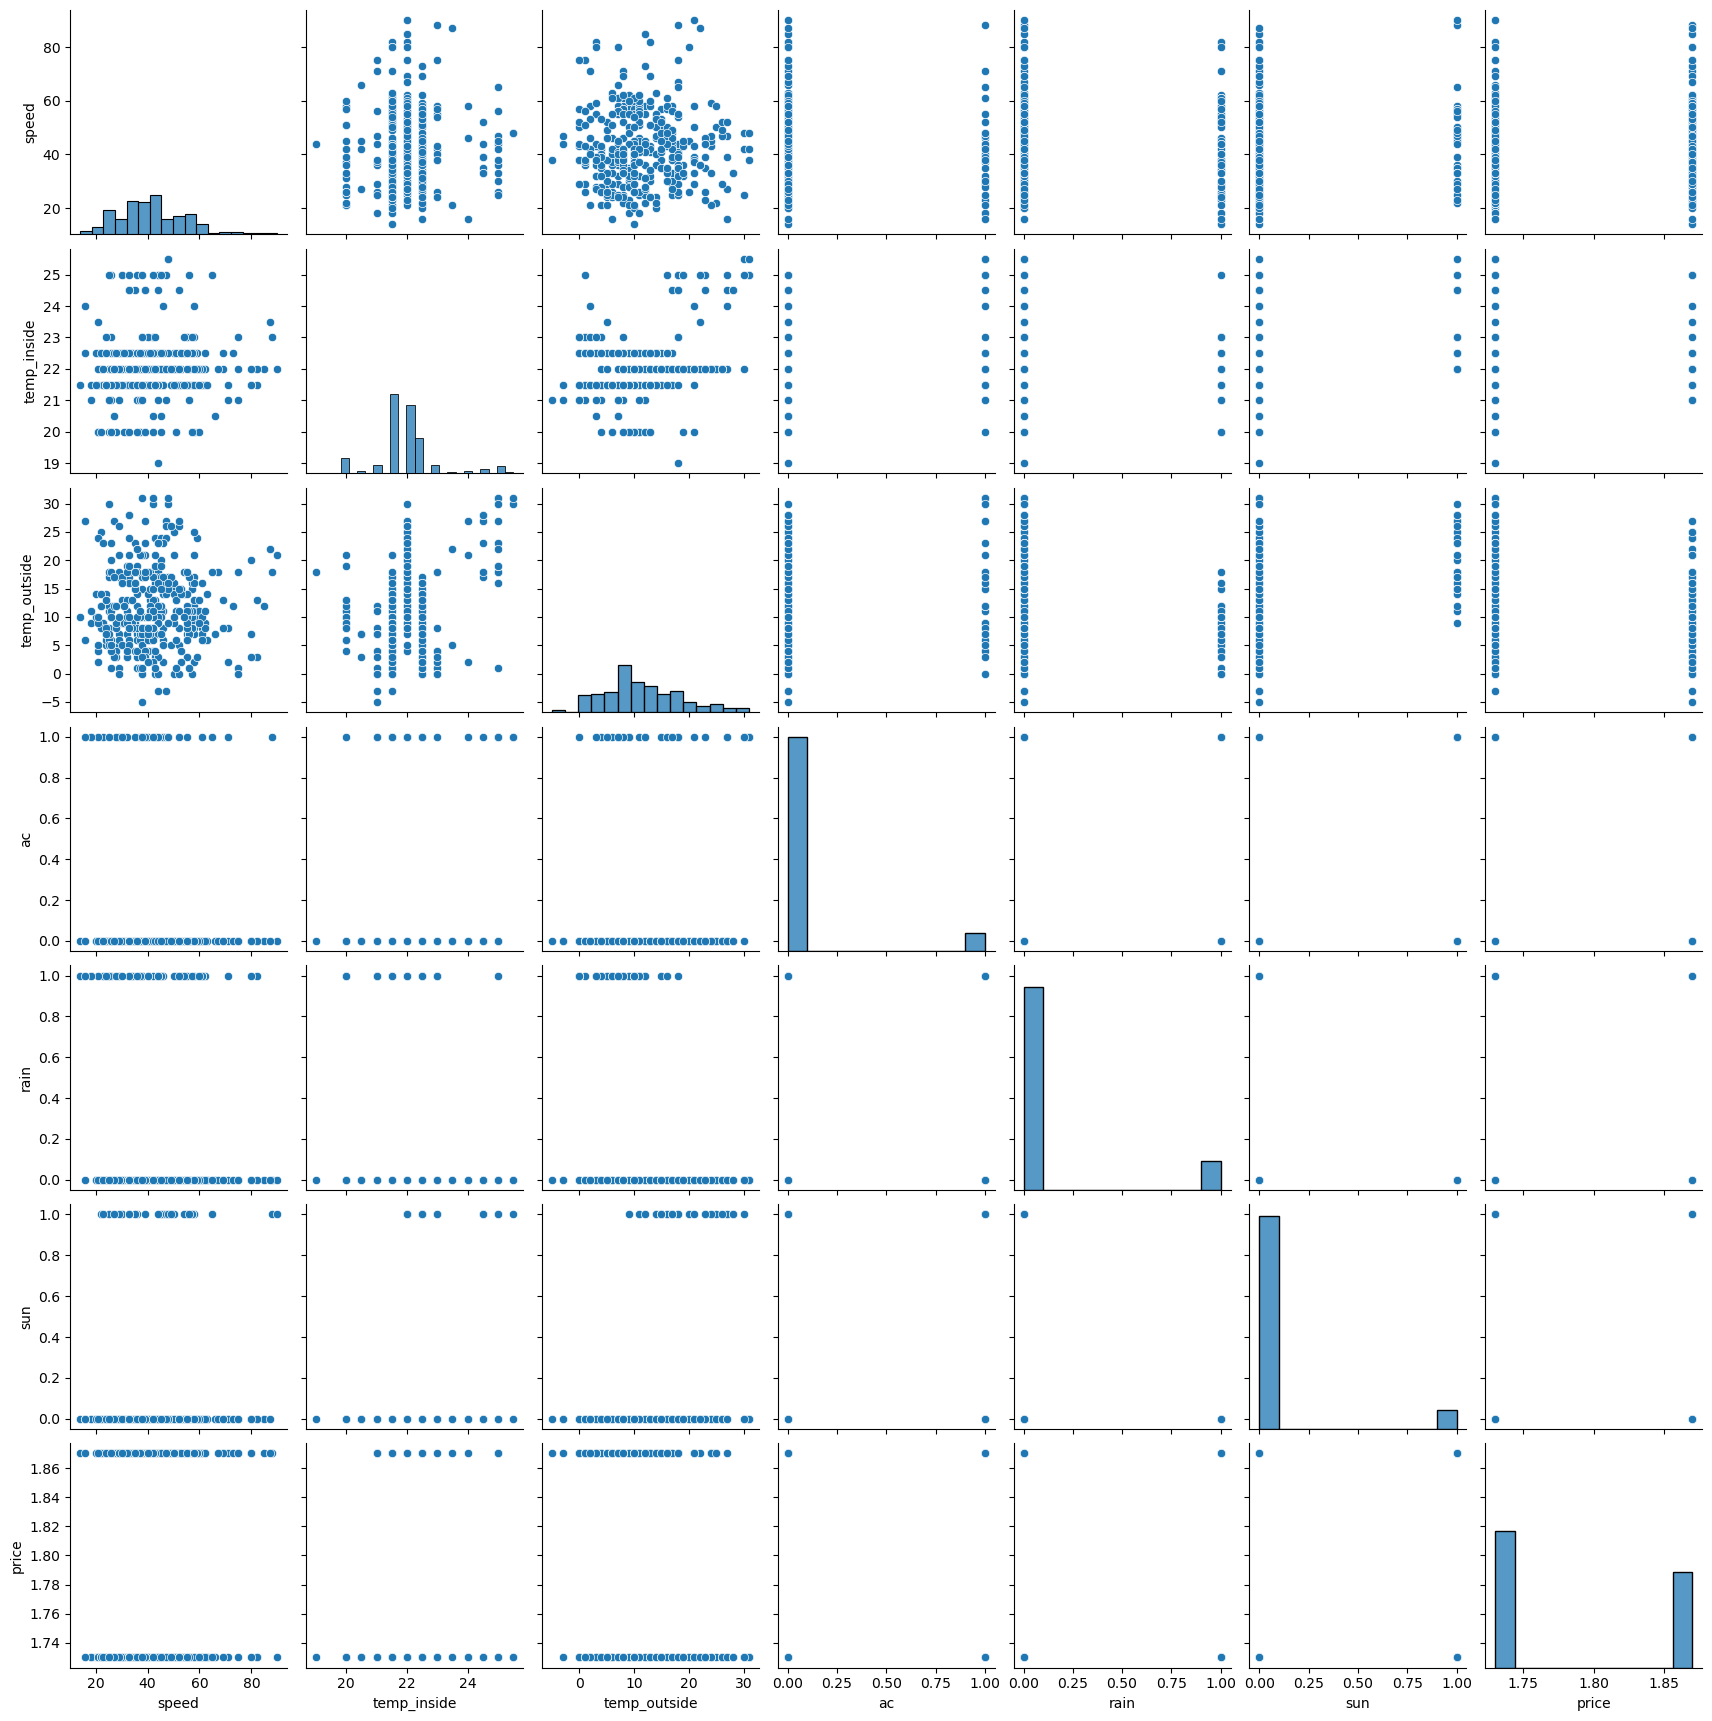

In [31]:
## Plotting all the correlation pairs 
sns.pairplot(df)
plt.show()

# Machine Learning - 1st model: Logistic regression 

In [32]:
df['distance'] = df['distance'].astype(np.float64)
df['consume'] = df['consume'].astype(np.float64)

In [33]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
price           float64
dtype: object

In [34]:
X = df.drop(columns=['gas_type'])
y = df['gas_type'] # setting the target

In [35]:
y.value_counts() # confirming that the upsampling worked

SP98    228
E10     160
Name: gas_type, dtype: int64

In [36]:
## train / test split

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [37]:
## Numerical / Categorical split 

X_train_numerical = X_train.select_dtypes(include=np.number)
X_train_categorical = X_train.select_dtypes(include=np.object)

X_test_numerical = X_test.select_dtypes(include=np.number)
X_test_categorical = X_test.select_dtypes(include=np.object)

/var/folders/0j/8qpr4dtj39x29g5tw9dvh26m0000gn/T/ipykernel_26916/1473060709.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include=np.object)
/var/folders/0j/8qpr4dtj39x29g5tw9dvh26m0000gn/T/ipykernel_26916/1473060709.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include=np.object)


In [38]:
X_train_numerical.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
ac                int64
rain              int64
sun               int64
price           float64
dtype: object

In [39]:
X_train_categorical.dtypes

specials    object
dtype: object

In [40]:
## Scaling the numerical 

#MinMax scaling Train
MinMaxtransformer = MinMaxScaler().fit(X_train_numerical)
x_train_normalized = MinMaxtransformer.transform(X_train_numerical)
x_train_normalized = pd.DataFrame(x_train_normalized,columns=X_train_numerical.columns)
X_num_train = x_train_normalized


#MinMax scaling Test
x_test_normalized = MinMaxtransformer.transform(X_test_numerical)
x_test_normalized = pd.DataFrame(x_test_normalized,columns=X_test_numerical.columns)
X_num_test = x_test_normalized

In [41]:
#Ordinally Encode Values
def ordenc(x):
    orden = []
    for i in x:
        if 'U' in i:
            orden.append(0)
        else:
            orden.append(1)
    x = orden
    return x

#Train
X_train_encoded = ordenc(X_train_categorical['specials'])
X_train_encoded = pd.DataFrame(X_train_encoded, columns = X_train_categorical.columns)

    
#Test
X_test_encoded = ordenc(X_test_categorical['specials'])
X_test_encoded = pd.DataFrame(X_test_encoded, columns = X_test_categorical.columns)

In [42]:
X_train_encoded

,specials
0,0
1,0
2,0
3,1
4,0
...,...
305,0
306,0
307,0
308,0


In [43]:
#Concat Trained Values
X_num_train = X_num_train.reset_index(drop = True)
X_train_encoded = X_train_encoded.reset_index(drop = True)
X_train_scaled = pd.concat([X_num_train, X_train_encoded], axis = 1)
X_train_scaled

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,price,specials
0,0.025605,0.224719,0.157895,0.384615,0.305556,0.0,0.0,0.0,0.0,0
1,0.048883,0.146067,0.342105,0.538462,0.194444,0.0,0.0,0.0,1.0,0
2,0.068901,0.134831,0.250000,0.384615,0.305556,0.0,0.0,0.0,0.0,0
3,0.115922,0.280899,0.750000,0.307692,0.361111,1.0,1.0,0.0,0.0,1
4,0.068436,0.089888,0.421053,0.461538,0.611111,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
305,0.003259,0.325843,0.078947,0.384615,0.416667,0.0,0.0,0.0,0.0,0
306,0.751397,0.247191,0.802632,0.615385,0.166667,0.0,0.0,0.0,0.0,0
307,0.068436,0.056180,0.355263,0.461538,0.472222,0.0,0.0,0.0,1.0,0
308,0.071229,0.146067,0.473684,0.461538,0.833333,0.0,0.0,0.0,1.0,0


In [44]:
#Concat Test Values
X_num_test = X_num_test.reset_index(drop = True)
X_test_encoded = X_test_encoded.reset_index(drop = True)
X_test_scaled = pd.concat([X_num_test, X_test_encoded], axis = 1)
X_test_scaled

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,price,specials
0,0.013501,0.258427,0.236842,0.461538,0.638889,0.0,0.0,0.0,1.0,0
1,0.060056,0.202247,0.236842,0.384615,0.333333,0.0,0.0,0.0,0.0,0
2,0.051210,0.314607,0.342105,0.384615,0.305556,0.0,0.0,0.0,1.0,0
3,0.048417,0.146067,0.302632,0.384615,0.305556,0.0,0.0,0.0,1.0,0
4,0.079143,0.112360,0.421053,0.461538,0.583333,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
73,0.054004,0.067416,0.289474,0.384615,0.527778,0.0,0.0,0.0,1.0,0
74,0.114525,0.179775,0.328947,0.384615,0.361111,0.0,0.0,0.0,1.0,0
75,0.051676,0.157303,0.381579,0.461538,0.416667,0.0,0.0,0.0,0.0,0
76,0.048883,0.157303,0.289474,0.307692,0.250000,0.0,0.0,0.0,0.0,0


In [45]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_scaled, y_train)

In [46]:
# The prediction:

predictions = classification.predict(X_test_scaled)
classification.score(X_test_scaled, y_test)

## need to come back here to fix the errer 

1.0

# Random Forest

In [47]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_num_train, y_train)
print(clf.score(X_num_train, y_train))
print(clf.score(X_num_test, y_test))

0.9741935483870968
0.9102564102564102


# Hypothesis: There is no difference between the gas tpyes, E10 and SP98

In [ ]:
display(E10.head(3))
display(SP98.head(3))

In [ ]:
confidence_level = 0.95
degrees_freedom = len(E10) - 1 
sample_mean = np.mean(E10)
sample_standard_error = scipy.stats.sem(gas['E10'])

confidence_interval_E10 = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)


In [ ]:
from scipy.stats import ttest_ind

stat, pval = ttest_ind(gas[gas['gas_type'] == 'E10'],gas[gas['gas_type'] == 'SP98'])
print(pval)
print(stat)